In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Загрузка данных

In [3]:
train = pd.read_csv("./Data/train.csv", sep=",")
test = pd.read_csv("./Data/test.csv", sep=",")

Файл сохранения предсказания

In [4]:
name_pred = "KuznetsovVV_predictions"

Исследование данных

In [5]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [6]:
test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


In [7]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [8]:
test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [11]:
train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Проверка на выбросы

In [12]:
train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

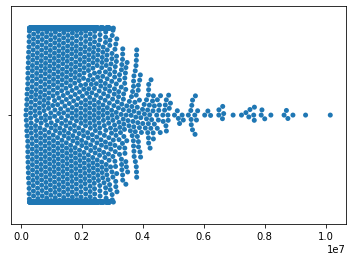

In [13]:
sns.swarmplot(x=train['Annual Income'].unique())

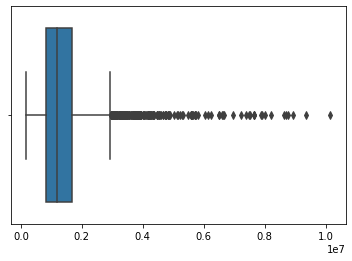

In [14]:
sns.boxplot(x=train['Annual Income'].unique()) # Возможно

In [15]:
train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [16]:
train['Tax Liens'].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [17]:
train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

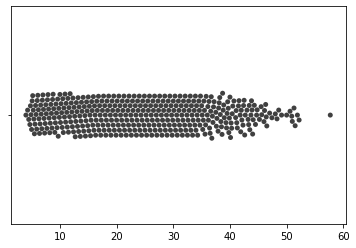

In [18]:
sns.swarmplot(x=train['Years of Credit History'].unique(), color=".25") # Возможен 1 выброс

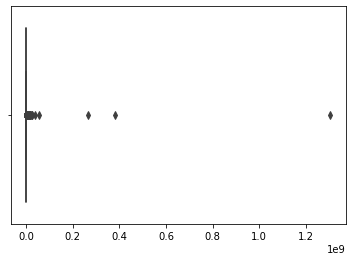

In [19]:
sns.boxplot(train['Maximum Open Credit'].unique()) # - Вероятней всего выбросы

In [20]:
train['Number of Credit Problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [21]:
train['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [22]:
train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [28]:
train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [29]:
train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

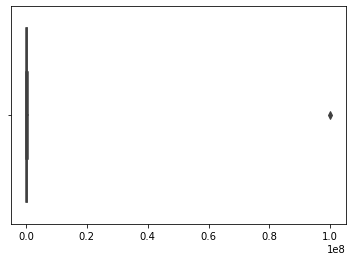

In [30]:
sns.boxplot(train['Current Loan Amount'].unique()) #Выброс

Судя по графику видна закономерность.

In [31]:
train['Current Loan Amount'].unique().max()

99999999.0

In [32]:
train.loc[train['Current Loan Amount'] == 99999999.0].count() #Видимо системный выброс

Home Ownership                  870
Annual Income                   870
Years in current job            829
Tax Liens                       870
Number of Open Accounts         870
Years of Credit History         870
Maximum Open Credit             870
Number of Credit Problems       870
Months since last delinquent    371
Bankruptcies                    867
Purpose                         870
Term                            870
Current Loan Amount             870
Current Credit Balance          870
Monthly Debt                    870
Credit Score                    870
Credit Default                  870
dtype: int64

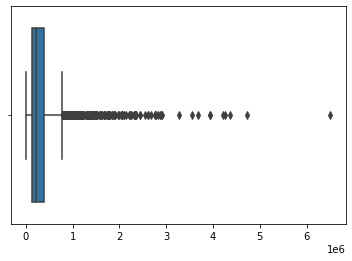

In [33]:
sns.boxplot(train['Current Credit Balance'].unique()) # Возможно

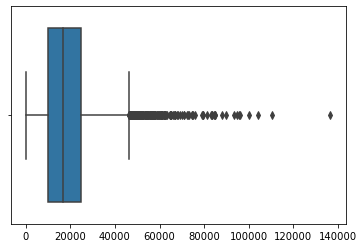

In [34]:
sns.boxplot(train['Monthly Debt'].unique()) # Возможно

Проверка на работоспособность при данных без пропусков

In [35]:
train_probe = train[(train.isnull().any(axis=1) != True)]

In [36]:
train.loc[train['Credit Score'] > 3000, 'Credit Score'] = train['Credit Score'] / 10 # Понижение с 0,30 до 0,12

In [37]:
train.loc[train['Credit Score'].isnull()]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1
10,Home Mortgage,NaN,< 1 year,0.0,7.0,11.5,256322.0,0.0,NaN,0.0,debt consolidation,Short Term,220858.0,187492.0,14592.0,NaN,0
16,Rent,NaN,7 years,0.0,6.0,17.8,899492.0,0.0,NaN,0.0,debt consolidation,Long Term,313038.0,538346.0,18844.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Home Mortgage,NaN,10+ years,0.0,14.0,30.5,645062.0,0.0,45.0,0.0,debt consolidation,Short Term,188430.0,518662.0,23506.0,NaN,0
7492,Home Mortgage,NaN,10+ years,0.0,10.0,13.3,423984.0,0.0,NaN,0.0,debt consolidation,Short Term,332948.0,161481.0,20966.0,NaN,0
7494,Own Home,NaN,< 1 year,0.0,7.0,8.2,301554.0,0.0,NaN,0.0,debt consolidation,Short Term,290400.0,210938.0,5070.0,NaN,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [38]:
train_probe['Home Ownership'] = LabelEncoder().fit_transform(train_probe['Home Ownership'])
train_probe['Years in current job'] = LabelEncoder().fit_transform(train_probe['Years in current job'])
train_probe['Purpose'] = LabelEncoder().fit_transform(train_probe['Purpose'])
train_probe['Term'] = LabelEncoder().fit_transform(train_probe['Term'])

<ipython-input-38-0447b6252e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_probe['Home Ownership'] = LabelEncoder().fit_transform(train_probe['Home Ownership'])
<ipython-input-38-0447b6252e9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_probe['Years in current job'] = LabelEncoder().fit_transform(train_probe['Years in current job'])
<ipython-input-38-0447b6252e9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [39]:
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Home Ownership'], prefix='Home Ownership')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Years in current job'], prefix='Years in current job')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Purpose'], prefix='Purpose')],axis=1)
train_probe = pd.concat([train_probe,pd.get_dummies(train_probe['Term'], prefix='Term')],axis=1)

In [40]:
train_probe.loc[train_probe['Current Loan Amount'] == 99999999.0, 'Current Loan Amount'] = train_probe['Current Loan Amount'].mean()

In [41]:
X_train_probe = train_probe.drop(["Credit Default"], axis = 1)
y_train_probe = train_probe["Credit Default"]

In [42]:
ac = 0
model_ac = []

model = RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_probe, y_train_probe, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_forest_pred = model.predict(X_test)

print('R2 оценка точности')
r2 = r2_score(y_test, y_forest_pred)
    
if ac < r2:
    model_ac = model
    ac = r2
print(r2)
    
print('Выбрана модель с точностью ' + str(ac))

R2 оценка точности
0.30457737746155367
Выбрана модель с точностью 0.30457737746155367


0.30457737746155367

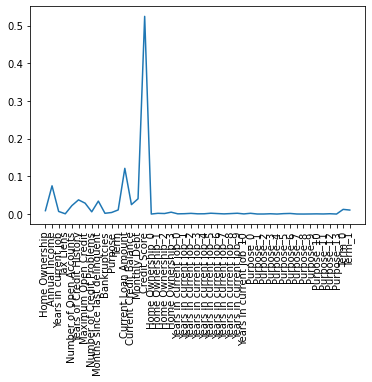

In [43]:
plt.plot(model_ac.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90);
r2

In [44]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from statsmodels.graphics.gofplots import qqplot

In [45]:
import warnings
warnings.simplefilter('ignore')

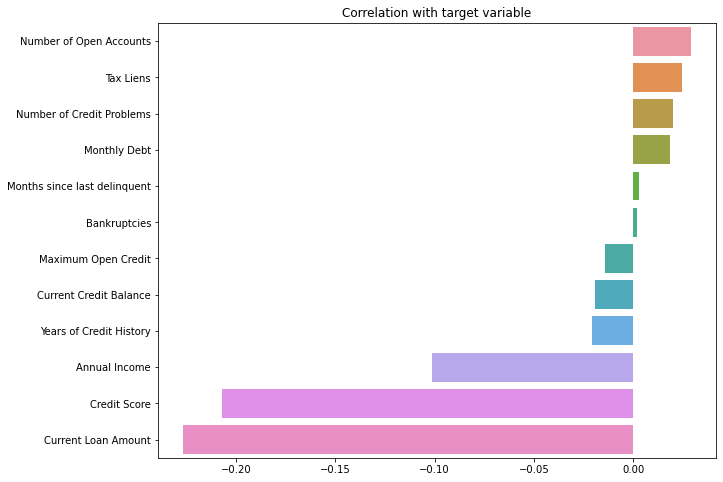

In [64]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = train.columns.drop(TARGET_NAME).tolist()
corr_with_target = train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

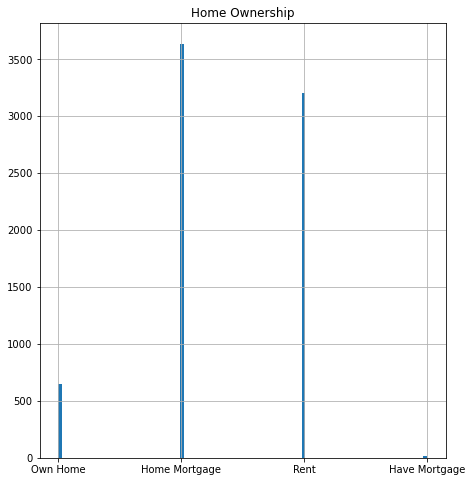

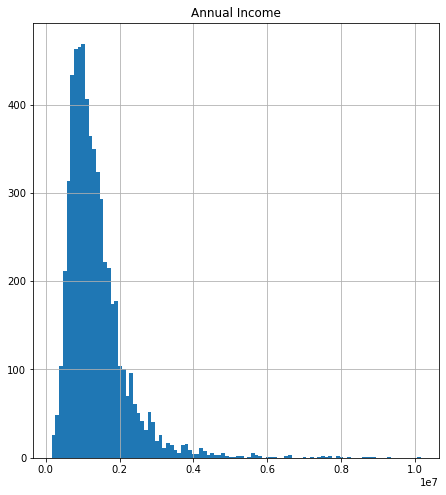

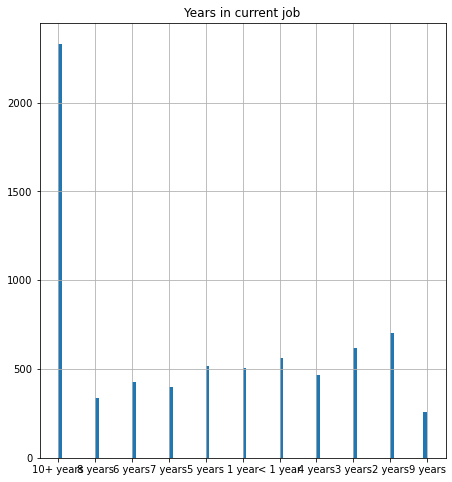

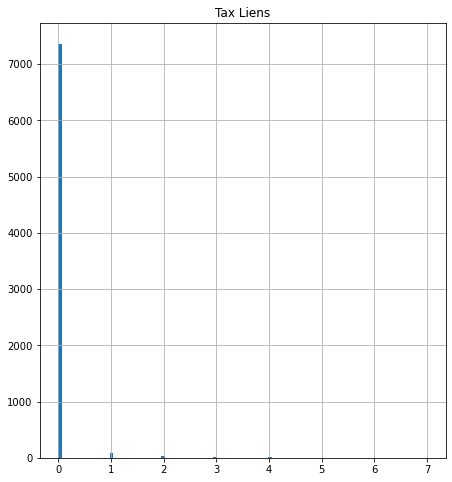

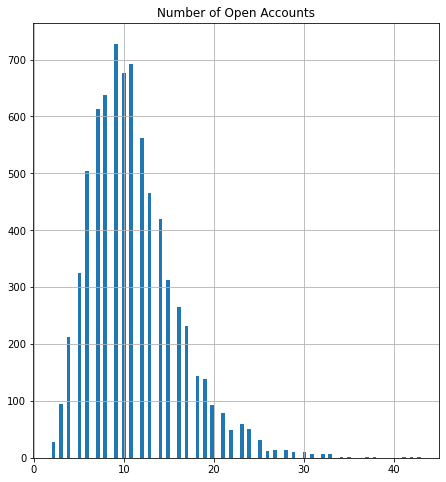

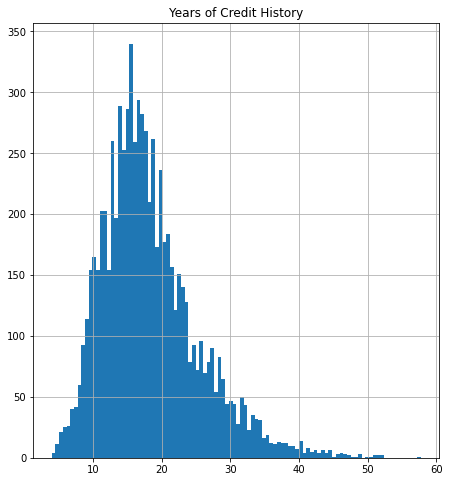

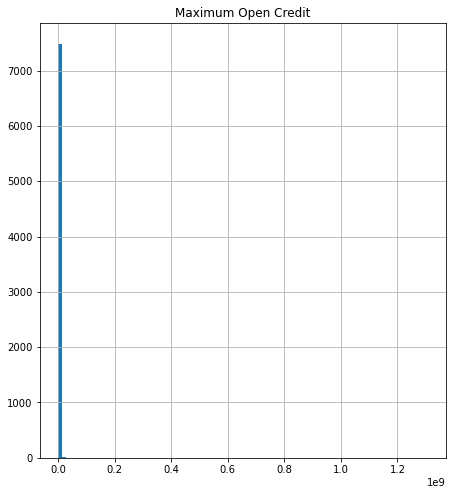

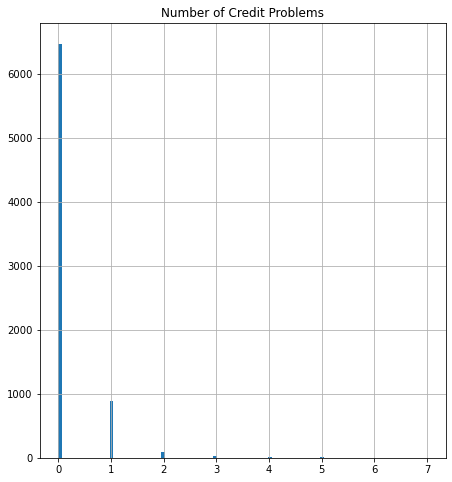

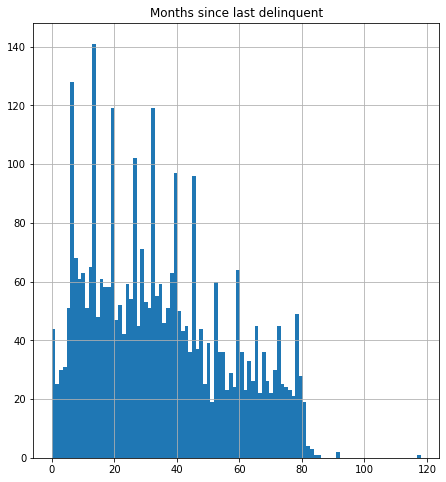

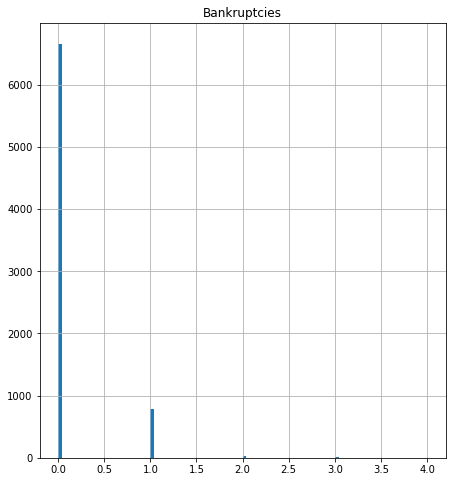

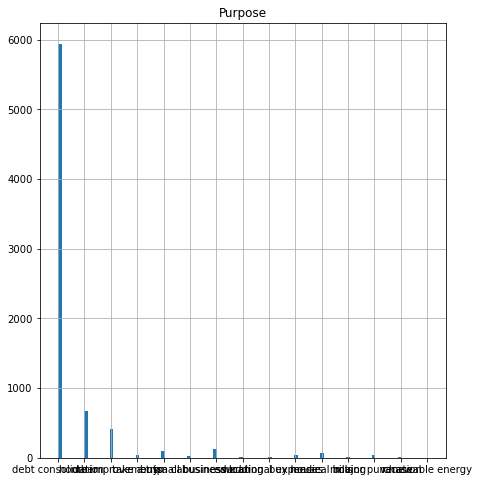

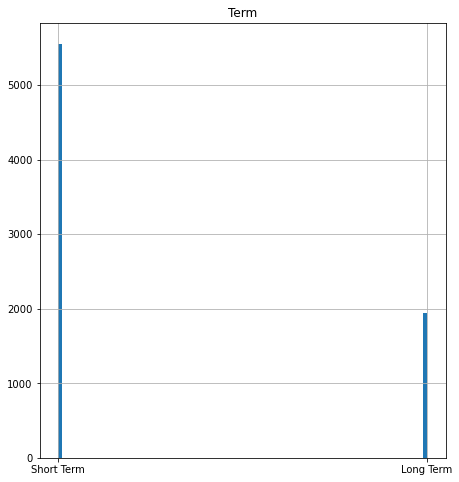

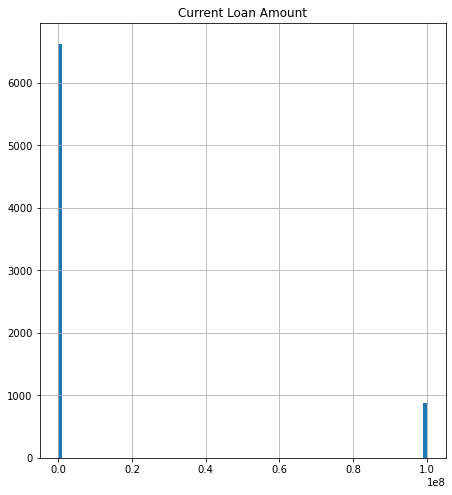

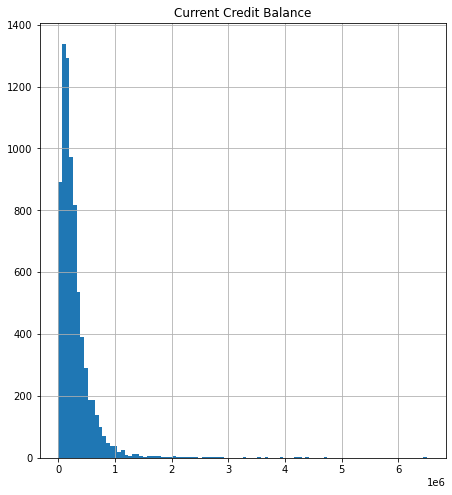

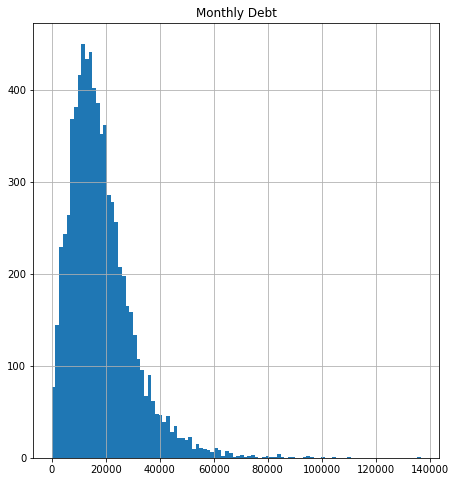

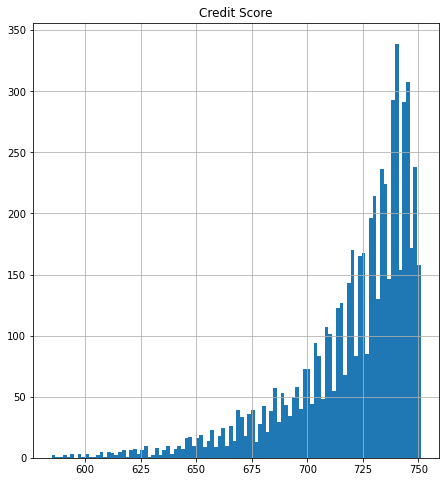

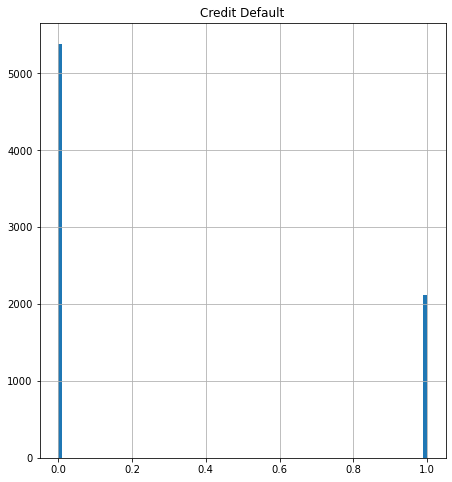

In [56]:
for name in train.columns:
    plt.figure(figsize= (16, 8))

    plt.subplot(122)
    temp = train[name]
    temp.hist(bins = 100)
    
    plt.title(str(name))
    plt.show()

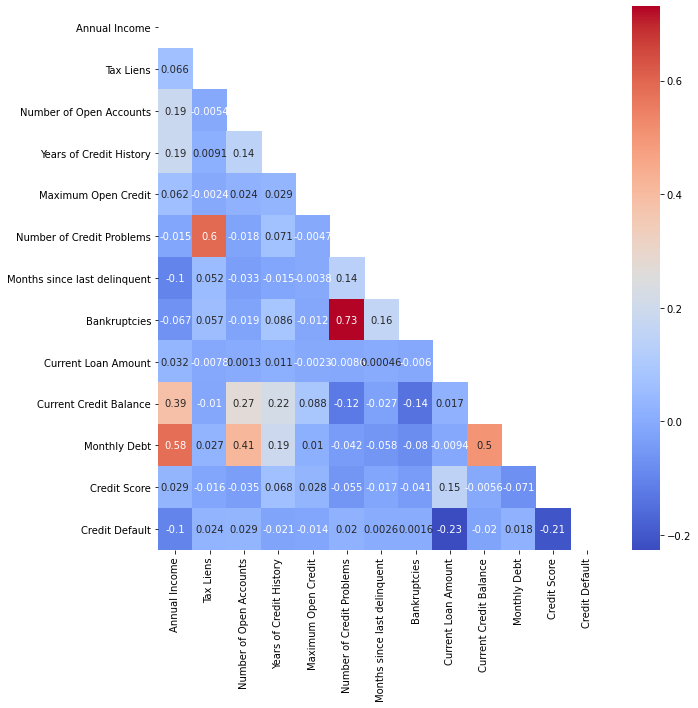

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
matrix = np.triu(train.corr())
sns.heatmap(train.corr(), annot=True, cmap= 'coolwarm', mask=matrix, ax=ax)

Возможные корреляции
- Bankruptcies + Number of Credit Problems
- Monthly Debt + Annual Income
- Monthly Debt + Tax Liens
- Monthly Debt + Current Credit Balance
- Current Credit Balance + Annual Income

In [85]:
#xx = train['Current Credit Balance']
#yy = train['Annual Income'] / 5
xx = np.log(train['Number of Open Accounts'] / 0.6)
yy = np.log(train['Years of Credit History'])

#xx = train['Monthly Debt']
#yy = train['Current Credit Balance']

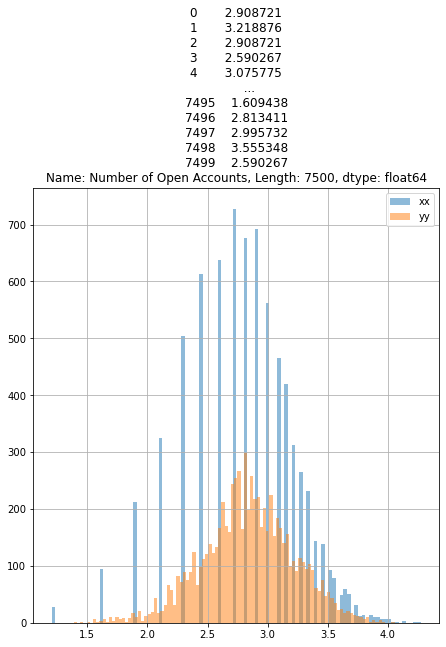

In [86]:
plt.figure(figsize= (16, 8))

plt.subplot(122)
(xx).hist(alpha=0.5, label='xx', bins = 100)
(yy).hist(alpha=0.5, label='yy', bins = 100)

plt.title(str(xx))
plt.legend()
plt.show()

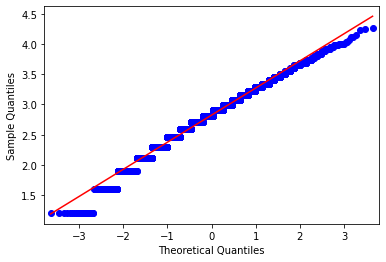

In [87]:
# q-q plot
qqplot(xx, line='s')
plt.show()

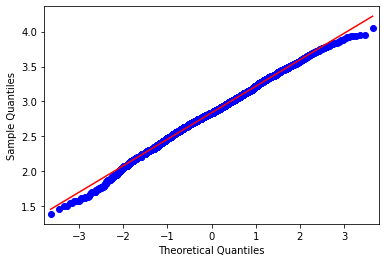

In [88]:
# q-q plot
qqplot(yy, line='s')
plt.show()

In [89]:
# Шапиро-Уилк
c,p = shapiro(xx)
print(c, p)

#D’Agostino’s K2 test
c,p = normaltest(xx)
print(p)

# Колмогоров-Смирнов
c,p = kstest(xx, 'norm')
print(p)

0.9871752858161926 1.6178159124689144e-25
1.5533507605018778e-39
0.0


logistic :  1.6178159124689144e-25 1.5533507605018778e-39 0.0


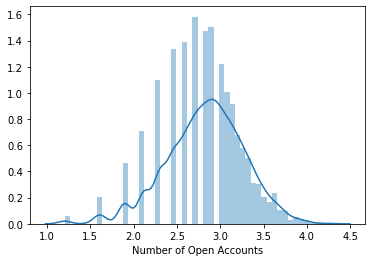

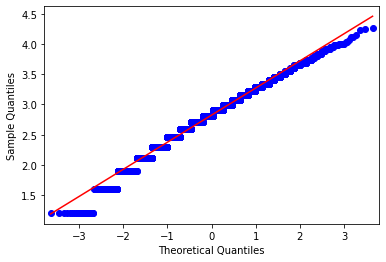

loggamma : 6.589366274845077e-10 2.7840158029163166e-08 0.0


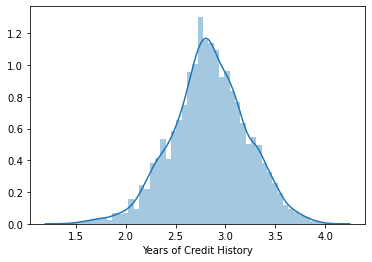

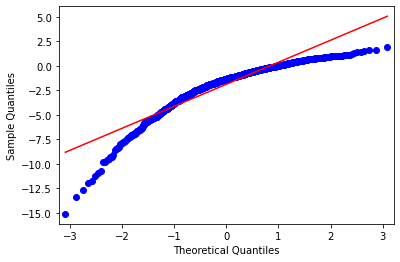

In [90]:
from scipy.stats import logistic,  loggamma, norm
c = 0.5
r2 = loggamma.rvs(c, size=1000)
r1 = logistic.rvs(size=1000)

c,p11 = shapiro(xx)
c,p12 = normaltest(xx)
c,p13 = kstest(xx, 'norm')
print('logistic : ',p11,p12,p13)

sns.distplot(xx)
plt.show()
qqplot(xx, line='s')
plt.show()

c,p21 = shapiro(yy)
c,p22 = normaltest(yy)
c,p23 = kstest(yy, 'norm')
print('loggamma :',p21,p22,p23)


sns.distplot(yy)
plt.show()
qqplot(r2, line='s')
plt.show()

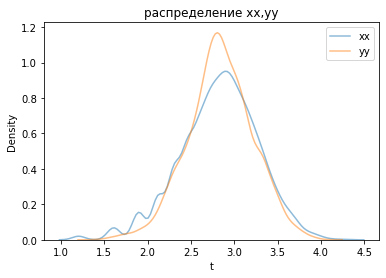

In [91]:
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(yy,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Приведенные график к нормальному распределению указывают на возможную зависимость. Необходимо проверить на шумы.

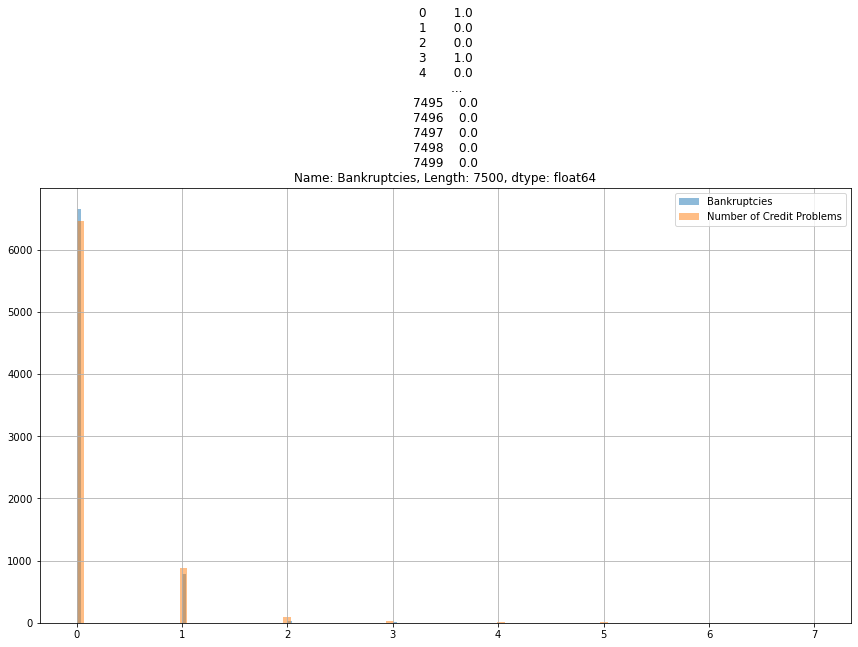

In [129]:
xx1 = (train['Bankruptcies'])
yy1 = (train['Number of Credit Problems'])
plt.figure(figsize= (32, 8))

plt.subplot(122)
(xx1).hist(alpha=0.5, label='Bankruptcies', bins = 100)
(yy1).hist(alpha=0.5, label='Number of Credit Problems', bins = 100)

plt.title(str(xx1))
plt.legend()
plt.show()

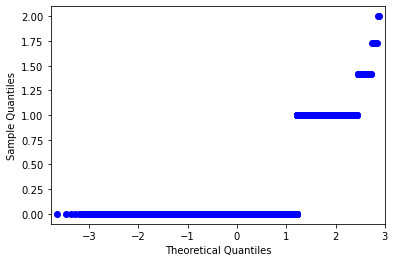

In [112]:
# q-q plot
qqplot(xx1, line='s')
plt.show()

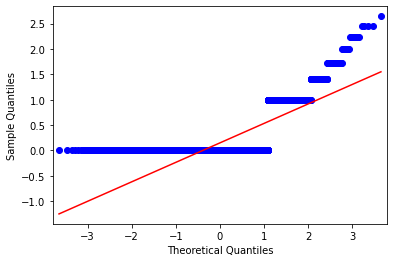

In [113]:
# q-q plot
qqplot(yy1, line='s')
plt.show()

Явное повторение.

No handles with labels found to put in legend.


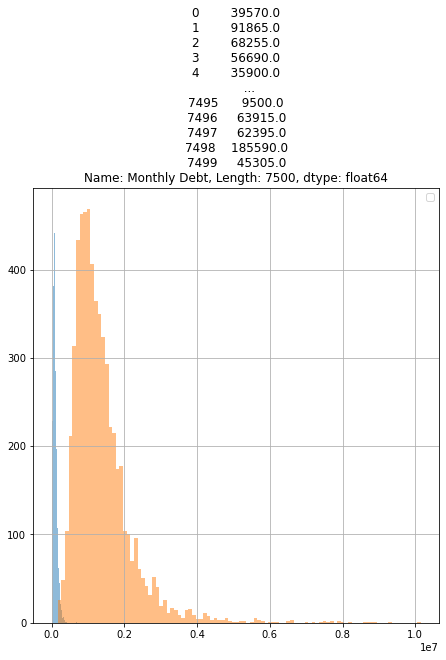

In [102]:
plt.figure(figsize= (16, 8))

xx2 = train['Monthly Debt']*5
yy2 = train['Annual Income']

plt.subplot(122)
xx2.hist(alpha=0.5, bins = 100)
yy2.hist(alpha=0.5, bins = 100)

plt.title(str(xx2))
plt.legend()
plt.show()

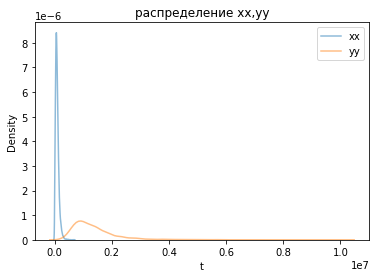

In [103]:
sns.kdeplot(xx2,alpha=0.5,label='xx')
sns.kdeplot(yy2,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение xx,yy')
plt.show()

Возможно есть корреляция, но возможно ее нет

In [58]:
from scipy.stats import ks_2samp, chi2_contingency

In [131]:
ks_2samp(xx,yy)

KstestResult(statistic=0.08586666666666666, pvalue=1.8086884001585272e-24)

In [135]:
ks_2samp(xx1,yy1)

KstestResult(statistic=0.025466666666666665, pvalue=0.01543391138164133)

In [136]:
ks_2samp(xx2,yy2)

KstestResult(statistic=0.9872, pvalue=0.0)

In [137]:
from sklearn.decomposition import PCA 

In [139]:
pca = PCA(n_components=2)
X= pca.fit_transform(train_probe.loc[:,['Bankruptcies', 'Number of Credit Problems','Monthly Debt', 'Annual Income', 'Tax Liens', 'Current Credit Balance']].values)

In [140]:
X

array([[  27603.72728353, -213299.19281616],
       [-434865.54857347, -116763.77369722],
       [ -61900.85370665,  -50263.84157641],
       ...,
       [1346774.98079871, -322242.24986853],
       [-209131.65636858,  -66271.43880953],
       [ 101273.59183271,  185466.51756591]])

In [141]:
train_probe['new_f1_pca']=X[:,0]
train_probe['new_f2_pca']=X[:,1]

In [142]:
train_probe

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Purpose_8,Purpose_9,Purpose_10,Purpose_11,Purpose_12,Purpose_13,Term_0,Term_1,new_f1_pca,new_f2_pca
6,1,1511108.0,1,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,...,0,0,0,0,0,0,0,1,2.760373e+04,-213299.192816
7,3,1040060.0,1,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,...,0,1,0,0,0,0,0,1,-4.348655e+05,-116763.773697
18,1,1401744.0,2,0.0,9.0,29.0,387222.0,0.0,40.0,0.0,...,0,0,0,0,0,0,1,0,-6.190085e+04,-50263.841576
20,1,1651993.0,1,0.0,11.0,26.5,663894.0,0.0,44.0,0.0,...,0,0,0,0,0,0,1,0,1.927175e+05,-31341.020557
21,1,1047394.0,6,0.0,7.0,34.4,401104.0,0.0,45.0,0.0,...,0,0,0,0,0,0,0,1,-4.157821e+05,-23981.460556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,1,1394942.0,1,0.0,15.0,27.2,1441396.0,0.0,35.0,0.0,...,0,0,0,0,0,0,0,1,-3.156337e+04,242979.537395
7490,2,1368000.0,1,0.0,20.0,26.7,897842.0,0.0,69.0,0.0,...,0,0,0,0,0,0,0,1,-5.562024e+04,266836.140184
7491,1,2833185.0,6,0.0,18.0,21.3,280170.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,1,1.346775e+06,-322242.249869
7493,3,1257610.0,8,0.0,14.0,16.5,821480.0,0.0,58.0,0.0,...,0,0,0,0,0,0,1,0,-2.091317e+05,-66271.438810
